# Projeto 13 - Compactação de imagens 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import pickle
import zipfile


In [3]:
with open ('datasets/traffic-signs-data/train.p', 'rb') as train_file:
    train = pickle.load(train_file)
    
with open ('datasets/traffic-signs-data/test.p', 'rb') as test_file:
    test = pickle.load(test_file)
    
with open ('datasets/traffic-signs-data/valid.p', 'rb') as valid_file:
    valid = pickle.load(valid_file)

In [5]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']

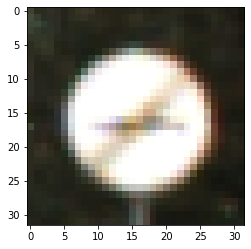

In [6]:
plt.imshow(X_train[152])

In [7]:
#preprocessamento
X_train = X_train/255
X_test = X_test/255
X_valid = X_valid/255

#### Criando e treinando  o autoencoder

In [31]:
autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same", input_shape=(32, 32, 3)))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))

# Encoded image (Code Layer)
autoencoder.add(tf.keras.layers.AveragePooling2D((2,2), padding="same")) 

# Decoder
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(64, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.Activation('relu'))
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))

autoencoder.add(tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same"))

In [34]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01))
autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_48 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_48 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
average_pooling2d_24 (Averag (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_49 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
activation_49 (Activation)   (None, 16, 16, 32)       

In [ ]:
autoencoder.fit(X_train,          
          X_train, 
          epochs=20, 
          batch_size=200, 
          validation_data=(X_test, X_test))

In [ ]:
predicted = autoencoder.predict(X_test[:10].reshape(-1, 32, 32, 3))

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([X_test[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [27]:
X_valid.shape, X_test.shape, X_train.shape

((4410, 32, 32, 3), (12630, 32, 32, 3), (34799, 32, 32, 3))